In [1]:
%config IPCompleter.use_jedi=False

In [2]:
import numpy as np
from scipy.stats import norm
from scipy import stats

import matplotlib.pyplot as plt

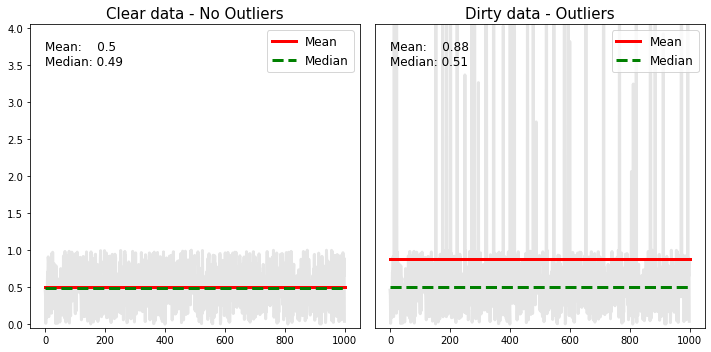

In [13]:
# create data distribution
n = 1000
amplitude = 1
dist = amplitude*np.random.uniform(0, 1, size=n)

# modify data distribution adding outliers 
n_outliers = 40
outlierAmplitude = 10
max_index = len(dist)-1
outliers_indexes = np.random.randint(low=0, high=max_index, size=n_outliers)
outliers = np.zeros(len(dist))
outliers[outliers_indexes] = outlierAmplitude * \
                             np.random.exponential(size=n_outliers)
dist_modified = dist + outliers

# create x values
x = [0, n]

mean   = np.mean(dist)
median = np.median(dist)

mean_out   = np.mean(dist_modified)
median_out = np.median(dist_modified)

# compute means and median for clean data
y_mean = [mean, mean]
y_median = [median, median]

# compute means and median for dirty data (with outliers)
y_mean_out = [mean_out, mean_out]
y_median_out = [median_out,median_out]

# create canvas
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

title_size=15
text_size=12

# plot without Outliers
plt.sca(ax1)
plt.plot(dist, 'k-', alpha=0.1, linewidth=3)
linewidth=3
plt.plot(x, y_mean, '-', color='red', 
         linewidth=linewidth, label='Mean')
plt.plot(x, y_median, '--', color='green', 
         linewidth=linewidth, label='Median')
plt.ylim([-0.05, 4.05])
plt.title('Clear data - No Outliers', size=title_size)
plt.legend(fontsize='large')
plt.annotate('Mean:    {} \nMedian: {}'.format( np.round(np.mean(dist),2), 
                                               np.round(np.median(dist),2)), 
             (0, 3.5), fontsize=text_size)

# plot with Outliers
plt.sca(ax2)
plt.plot(dist_modified, 'k-', alpha=0.1, linewidth=3)
linewidth=3
plt.plot(x, y_mean_out, '-', color='red', 
         linewidth=linewidth, label='Mean')
plt.plot(x, y_median_out, '--', color='green', 
         linewidth=linewidth, label='Median')
plt.ylim([-0.05, 4.05])
plt.title('Dirty data - Outliers', fontsize=title_size)
plt.legend(loc='upper right', fontsize='large') 
plt.yticks([])
plt.annotate('Mean:    {} \nMedian: {}'.format(np.round(mean_out,2), 
                                               np.round(median_out,2)), 
             xy=(0, 3.5), fontsize=text_size)
plt.tight_layout()